In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Parquet file into an Arrow Table
table1 = pq.read_table("00_data/MSTR.parquet")
table2 = pq.read_table("00_data/MSTU.parquet")

# table1 = pq.read_table("00_data/TSLA.parquet")
# table2 = pq.read_table("00_data/TSLL.parquet")

# table1 = pq.read_table("00_data/TSLA.parquet")
# table2 = pq.read_table("00_data/TSLS.parquet")

# table1 = pq.read_table("00_data/QQQ.parquet")
# table2 = pq.read_table("00_data/TQQQ.parquet")

# table1 = pq.read_table("00_data/QQQ.parquet")
# table2 = pq.read_table("00_data/SQQQ.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")
# table2 = pq.read_table("00_data/UPRO.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")
# table2 = pq.read_table("00_data/SPXL.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")
# table2 = pq.read_table("00_data/SPXU.parquet")

# table1 = pq.read_table("00_data/UPRO.parquet")
# table2 = pq.read_table("00_data/SPXL.parquet")

# table1 = pq.read_table("00_data/SPXL.parquet")
# table2 = pq.read_table("00_data/SPXU.parquet")

In [3]:

# Convert Arrow Table back to Pandas DataFrame
df1 = table1.to_pandas()
df2 = table2.to_pandas() # (df2 usually is the leveraged ETF)

In [4]:
# # Extract Ticker symbols directly from df1 and df2, column 'Ticker', unique values
ticker1 = df1['Ticker'].unique()[0]
ticker2 = df2['Ticker'].unique()[0]

In [5]:
df1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
0,2003-10-09 09:29:00,MSTR,1065706140000,5.0210,5.091,5.017,5.091,30000.0,5.0586,22
1,2003-10-09 09:30:00,MSTR,1065706200000,5.0851,5.094,5.085,5.094,25990.0,5.0907,10
2,2003-10-09 09:31:00,MSTR,1065706260000,5.0940,5.094,5.070,5.070,60510.0,5.0839,16
3,2003-10-09 09:32:00,MSTR,1065706320000,5.0700,5.075,5.070,5.075,2000.0,5.0725,2
4,2003-10-09 09:33:00,MSTR,1065706380000,5.0620,5.062,5.052,5.052,2000.0,5.0570,2


In [6]:
print(df1.columns)

"""
T: This is a timestamp in milliseconds (Unix epoch time). 
The value 1760140500000 converts to October 10, 2025, 19:55:00 UTC, which matches the Date column.

N: This is likely the number of trades or number of data points used to calculate the VWAP for that time interval. 
The value 26 suggests 26 individual trades or ticks were aggregated.

The N column provides useful information about data quality. 
Higher values of N typically indicate more liquid trading periods with better VWAP reliability
""";

Index(['Date', 'Ticker', 'T', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'N'],
      dtype='object')


In [7]:
df1.tail()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
1414722,2025-10-10 19:55:00,MSTR,1760140500000,300.960,300.960,300.9600,300.9600,317.0,300.5696,26
1414723,2025-10-10 19:56:00,MSTR,1760140560000,300.960,300.960,300.0000,300.5000,1803.0,300.2599,41
1414724,2025-10-10 19:57:00,MSTR,1760140620000,300.890,300.890,300.0903,300.0903,938.0,300.4362,34
1414725,2025-10-10 19:58:00,MSTR,1760140680000,300.019,300.019,300.0000,300.0000,447.0,300.2485,25
1414726,2025-10-10 19:59:00,MSTR,1760140740000,300.000,300.070,299.2100,299.2100,1427.0,299.9531,79


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414727 entries, 0 to 1414726
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1414727 non-null  datetime64[ns]
 1   Ticker  1414727 non-null  object        
 2   T       1414727 non-null  int64         
 3   Open    1414727 non-null  float64       
 4   High    1414727 non-null  float64       
 5   Low     1414727 non-null  float64       
 6   Close   1414727 non-null  float64       
 7   Volume  1414727 non-null  float64       
 8   VWAP    1414727 non-null  float64       
 9   N       1414727 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 107.9+ MB


In [9]:
df2.sample(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
47341,2024-12-23 14:04:00,MSTU,1734980640000,10.7188,10.7401,10.690,10.7401,96609.0,10.7114,247
103108,2025-03-25 10:12:00,MSTU,1742911920000,7.4750,7.5554,7.470,7.5554,204081.0,7.5207,202
178607,2025-07-23 12:19:00,MSTU,1753287540000,8.8100,8.8123,8.795,8.7950,20321.0,8.8043,60
13050,2024-10-23 06:51:00,MSTU,1729680660000,6.1380,6.1380,6.138,6.1380,2230.0,6.1335,8
195781,2025-08-19 13:40:00,MSTU,1755625200000,5.6101,5.6289,5.600,5.6264,71490.0,5.6085,101


In [10]:
# Add year, month, day, hour, minute columns for easier filtering on df1 and df2
for df in [df1, df2]:
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['hour'] = pd.to_datetime(df['Date']).dt.hour
    df['minute'] = pd.to_datetime(df['Date']).dt.minute

In [11]:
# Add a new column 'ym' representing the last day of each month on df1 and df2
for df in [df1, df2]:
    df['ym'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [12]:
# Add a new column 'td' representing the trading day within the month on df1 and df2
for df in [df1, df2]:
    df['td'] = df.groupby('ym')['day'].cumcount() + 1 # trading day within the month

In [13]:
# Create trading day counter for minute-level data
for df in [df1, df2]:
    # First, extract just the date (without time) from the datetime
    df['date_only'] = pd.to_datetime(df['Date']).dt.date
    
    # For each year-month group, get unique dates and assign trading day numbers
    df['td'] = df.groupby('ym')['date_only'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

In [14]:
# Add week number, dt.isocalendar()[1]  # ISO week number
for df in [df1, df2]:
    df['week_number'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [15]:
# Add day identifier, int to indicate the day of week (0=Monday, 6=Sunday) on df1 and df2
for df in [df1, df2]:
    df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [16]:
# VWAP signal, if Close > VWAP -> 1 else 0 on df1 and df2
for df in [df1, df2]:
    df['vwap_signal'] = np.where(df['Close'] > df['VWAP'], 1, 0)

In [17]:
# Calculate daily simple returns for df1 and df2
# Calculate percentage change of 'Close' within each ticker
df1['ret'] = df1.groupby('Ticker')['Close'].pct_change()
df2['ret'] = df2.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
df1['ret'] = df1['ret'].fillna(0)
df2['ret'] = df2['ret'].fillna(0)

In [18]:
# calculate cumulative returns for df1 and df2
df1['cumret'] = (1 + df1['ret']).cumprod() - 1
df2['cumret'] = (1 + df2['ret']).cumprod() - 1

In [19]:
# Filter last 180 days of data for both df1 and df2
end_date = max(df1['Date'].max(), df2['Date'].max())
start_date = end_date - pd.Timedelta(days=180)
df1_last_180 = df1[df1['Date'] >= start_date]
df2_last_180 = df2[df2['Date'] >= start_date]

In [ ]:
"""
Leveraged ETFs tend to have lower length of data compared to their underlying assets due to most recent inception dates.
Apply below filtering only when comparing leveraged ETF with its underlying asset.
"""

In [21]:
# Filter df1 by min() date of df2.date_only (df2 usually is the leveraged ETF, with shorter history)
min_date_df2 = df2['date_only'].min()
df1 = df1[df1['date_only'] >= min_date_df2]

In [26]:
# Add backtest df to be used for strategies backtesting
bt1 = df1.copy()
bt2 = df2.copy()

In [22]:
"""
For MSTR and MSTU, the highest average returns tend to occur before opening hours.
This should be further investigated to understand the underlying causes.

This highest average returns, happens with a very low volume, as it is shown later in the notebook.

Overnight returns (pre/after market) tend to show higher average returns for both tickers.
Intraday returns (during market hours) tend to show lower average returns for both tickers.

""";


In [23]:
# Filter df1 and df2 for market hours only (9:30 to 16:00)
market_hours_df1 = df1[(df1['hour'] >= 9) & ((df1['hour'] < 16) | ((df1['hour'] == 9) & (df1['minute'] >= 30)))]
market_hours_df2 = df2[(df2['hour'] >= 9) & ((df2['hour'] < 16) | ((df2['hour'] == 9) & (df2['minute'] >= 30)))]

# Filter df1 and df2 for first hour of market only
first_hour_df1 = df1[((df1['hour'] == 9) & (df1['minute'] >= 30)) | (df1['hour'] == 10)]
first_hour_df2 = df2[((df2['hour'] == 9) & (df2['minute'] >= 30)) | (df2['hour'] == 10)]

# Filter df1 and df2 for last hour of market only
last_hour_df1 = df1[(df1['hour'] == 15)]
last_hour_df2 = df2[(df2['hour'] == 15)]

In [24]:
# Group df1 and df2 by date_only and calculate daily returns
df1_daily = df1.groupby('date_only').agg({'Close': 'last'}).reset_index()
df1_daily['ret'] = df1_daily['Close'].pct_change().fillna(0)
df1_daily['cumret'] = (1 + df1_daily['ret']).cumprod() - 1
df2_daily = df2.groupby('date_only').agg({'Close': 'last'}).reset_index()
df2_daily['ret'] = df2_daily['Close'].pct_change().fillna(0)
df2_daily['cumret'] = (1 + df2_daily['ret']).cumprod() - 1

# Join df1_daily and df2_daily on date_only
df_joined = df1_daily.merge(df2_daily, on='date_only', suffixes=(f'_{ticker1}', f'_{ticker2}'))

# Display first few rows of df_joined
df_joined.head()

,date_only,Close_MSTR,ret_MSTR,cumret_MSTR,Close_MSTU,ret_MSTU,cumret_MSTU
0,2024-09-18,135.7400,0.000000,0.000000,2.6820,0.000000,0.000000
1,2024-09-19,144.5000,0.064535,0.064535,3.0150,0.124161,0.124161
2,2024-09-20,145.2000,0.004844,0.069692,3.0440,0.009619,0.134974
3,2024-09-23,149.2977,0.028221,0.099880,3.2029,0.052201,0.194221
4,2024-09-24,154.2246,0.033001,0.136177,3.3930,0.059352,0.265101


In [27]:
bt1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N,...,hour,minute,ym,td,date_only,week_number,day_of_week,vwap_signal,ret,cumret
1213936,2024-09-18 04:00:00,MSTR,1726646400000,132.75,132.75,132.75,132.75,412.0,132.5968,25,...,4,0,2024-09-30,12,2024-09-18,38,2,1,0.006063,25.075427
1213937,2024-09-18 04:01:00,MSTR,1726646460000,132.33,132.33,132.33,132.33,736.0,132.3750,35,...,4,1,2024-09-30,12,2024-09-18,38,2,0,-0.003164,24.992929
1213938,2024-09-18 04:02:00,MSTR,1726646520000,132.66,133.49,132.66,133.30,3992.0,132.9765,117,...,4,2,2024-09-30,12,2024-09-18,38,2,1,0.007330,25.183461
1213939,2024-09-18 04:03:00,MSTR,1726646580000,133.10,133.25,133.10,133.25,2050.0,133.1477,89,...,4,3,2024-09-30,12,2024-09-18,38,2,1,-0.000375,25.173640
1213940,2024-09-18 04:04:00,MSTR,1726646640000,133.25,133.25,133.00,133.00,1348.0,133.1446,20,...,4,4,2024-09-30,12,2024-09-18,38,2,0,-0.001876,25.124533


In [28]:
# Create daily df, grouping by date_only and aggregating OHLCV data (keep last for Open, High, Low, Close; sum for Volume)
daily_df1 = bt1.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

daily_df2 = bt2.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',   
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

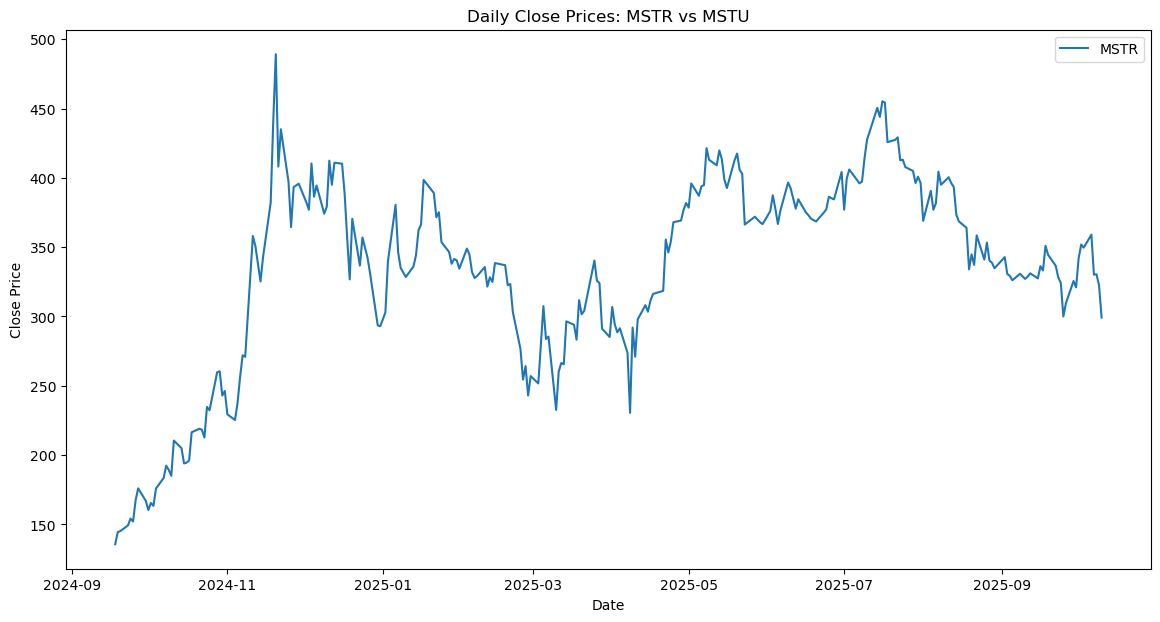

In [31]:
# Plot daily_df1 for visualization purposes
plt.figure(figsize=(14, 7))
plt.plot(daily_df1['date_only'], daily_df1['Close'], label=ticker1)
# plt.plot(daily_df2['date_only'], daily_df2['Close'], label=ticker2)
plt.title(f'Daily Close Prices: {ticker1} vs {ticker2}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# ----------------------------------------------------------------------
# Overnight vs Intraday returns analysis
# ----------------------------------------------------------------------

In [ ]:
def calculate_overnight_returns(df, tickers):
    """
    Calculate overnight returns.

    It simulates the entry (buy) at the closing price of the current day and exit (sell) at the opening price of the next trading day.
    
    Parameters:
    df: daily DataFrame with aggregated OHLCV data
    tickers: separate run for each ticker is required
    
    Returns:
    DataFrame with additional next_day_open and overnight_return columns for each ticker
    """
    df_new = df.copy()
    
    for ticker in tickers:
        try:
            # Check if the ticker exists in the dataframe
            if ticker not in df.columns.levels[0]:
                print(f"Warning: Ticker '{ticker}' not found in dataframe")
                continue
                
            # Calculate next day open (shift open price by -1 day)
            df_new[(ticker, 'next_day_open')] = df_new[(ticker, 'Open')].shift(-1)
            
            # Calculate overnight return: (next_day_open - close) / close
            df_new[(ticker, 'overnight_return')] = (
                (df_new[(ticker, 'next_day_open')] - df_new[(ticker, 'Close')]) / 
                df_new[(ticker, 'Close')]
            )
            # calculate cumulative returns
            df_new[(ticker, 'overnight_cumulative_return')] = (1 + df_new[(ticker, 'overnight_return')]).cumprod() - 1
            
            print(f"Processed ticker: {ticker}")
            
        except KeyError as e:
            print(f"Error processing ticker '{ticker}': {e}")
        except Exception as e:
            print(f"Unexpected error for ticker '{ticker}': {e}")
    
    return df_new

# Apply the function to create a new dataframe
df_with_overnight = calculate_overnight_returns(df, level_0_tickers)

# Display the shape and first few rows to verify
print(f"\nOriginal dataframe shape: {df.shape}")
print(f"New dataframe shape: {df_with_overnight.shape}")
print(f"\nFirst few rows of new columns for first ticker ({level_0_tickers[0]}):")
print(df_with_overnight[[
    (level_0_tickers[0], 'Close'),
    (level_0_tickers[0], 'next_day_open'),
    (level_0_tickers[0], 'overnight_return')
]].head(10))